# 1. Install and Import Dependencies

In [4]:
!pip install torch torchvision torchaudio

  Using cached torchvision-0.15.2-cp310-cp310-win_amd64.whl (1.2 MB)
     ---------------------------------------- 2.1/2.1 MB 1.6 MB/s eta 0:00:00
  Using cached torch-2.0.1-cp310-cp310-win_amd64.whl (172.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1


In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [6]:
!cd yolov5 & pip install -r requirements.txt

     ------------------------------------ 184.3/184.3 kB 428.8 kB/s eta 0:00:00
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
     ------------------------------------ 612.6/612.6 kB 602.3 kB/s eta 0:00:00
     -------------------------------------- 62.7/62.7 kB 673.0 kB/s eta 0:00:00


In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Users\Acer pc\anaconda4\lib\site-packages\torch\hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Acer pc/.cache\torch\hub\master.zip
YOLOv5  2023-6-28 Python-3.10.9 torch-2.0.1+cpu CPU

100%|██████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:21<00:00, 685kB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 para

In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [18]:
img = r'https://c8.alamy.com/comp/H9MW2A/young-couple-sitting-in-the-car-to-sleep-H9MW2A.jpg'

In [19]:
results = model(img)
results.print()

image 1/1: 956x1300 1 person
Speed: 2265.6ms pre-process, 217.3ms inference, 8.1ms NMS per image at shape (1, 3, 480, 640)


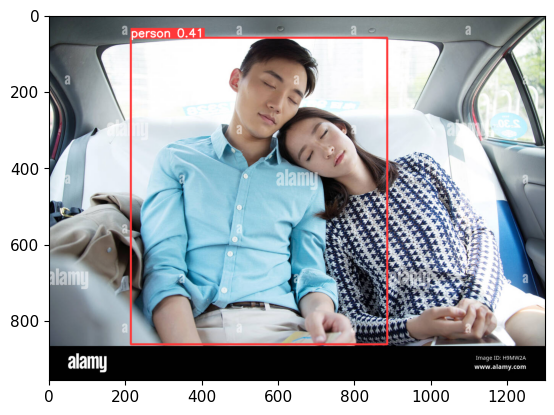

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [21]:
results.render()

[array([[[ 34,  42,  45],
         [ 34,  42,  45],
         [ 35,  43,  46],
         ...,
         [ 78,  93,  90],
         [ 82,  97,  94],
         [ 90, 105, 102]],
 
        [[ 34,  42,  45],
         [ 34,  42,  45],
         [ 35,  43,  46],
         ...,
         [ 87, 102,  99],
         [ 93, 108, 105],
         [ 98, 113, 110]],
 
        [[ 34,  42,  45],
         [ 34,  42,  45],
         [ 35,  43,  46],
         ...,
         [100, 112, 110],
         [103, 115, 113],
         [101, 113, 111]],
 
        ...,
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
  

In [22]:
img1= r'https://previews.123rf.com/images/tommaso79/tommaso791712/tommaso79171200054/91254912-man-falling-asleep-in-car-after-long-hour-drive.jpg'

In [23]:
results = model(img1)
results.print()

image 1/1: 866x1300 1 person
Speed: 1757.5ms pre-process, 196.2ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


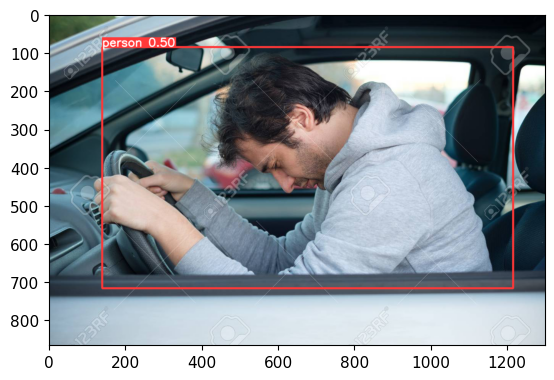

In [24]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Real Time Detections

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [26]:
import uuid   # Unique identifier
import os
import time

In [27]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [45]:
import cv2
import os
import time
import uuid

# Set the directory to save the images
SAVE_DIR = r"C:\Users\Acer pc\Downloads\Drowsiness Detection"

# Create the directory if it doesn't exist
os.makedirs(SAVE_DIR, exist_ok=True)

cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming the image path
        imgname = os.path.join(SAVE_DIR, label + '.' + str(uuid.uuid1()) + '.jpg')

        # Writes the image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2-second delay between captures
        time.sleep(0.5)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [48]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.1a807f72-15ad-11ee-9cc3-744ca14e3914.jpg


In [49]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.1b59fdae-15ad-11ee-b2f9-744ca14e3914.jpg
data\images\awake.1b59fdaf-15ad-11ee-bbdb-744ca14e3914.jpg
data\images\awake.1b59fdb0-15ad-11ee-a3f5-744ca14e3914.jpg
data\images\awake.1b59fdb1-15ad-11ee-a08c-744ca14e3914.jpg
data\images\awake.1b59fdb2-15ad-11ee-9937-744ca14e3914.jpg
data\images\drowsy.1b59fdb3-15ad-11ee-af50-744ca14e3914.jpg
data\images\drowsy.1b59fdb4-15ad-11ee-807a-744ca14e3914.jpg
data\images\drowsy.1b59fdb5-15ad-11ee-8949-744ca14e3914.jpg
data\images\drowsy.1b59fdb6-15ad-11ee-845b-744ca14e3914.jpg
data\images\drowsy.1b59fdb7-15ad-11ee-b64a-744ca14e3914.jpg


In [31]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [32]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [79]:
cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data "C:\Users\Acer pc\Downloads\yolov5\models\yolov5l.yaml" --weights yolov5s.pt --workers 2


[WinError 123] The filename, directory name, or volume label syntax is incorrect: 'yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data C:\\Users\\Acer pc\\Downloads\\yolov5\\models\\yolov5l.yaml --weights yolov5s.pt --workers 2'
C:\Users\Acer pc\Downloads


# 6. Load Custom Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2021-7-11 torch 1.8.1+cu111 CUDA:0 (GeForce RTX 2070 SUPER, 8192.0MB)

Fusing layers... 
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [52]:
img = os.path.join('data', 'images', r"C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.05249e6e-15ad-11ee-9883-744ca14e3914.jpg")

In [53]:
results = model(img)

In [54]:
results.print()

image 1/1: 480x640 1 person
Speed: 10.4ms pre-process, 175.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)


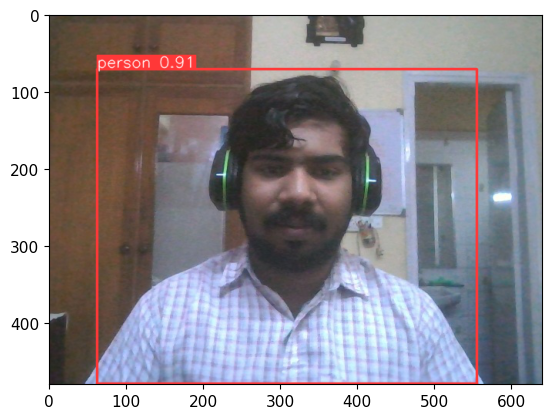

In [55]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [56]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Drowsy

In [57]:
import uuid
import os
import cv2

SAVE_DIR = r"C:\Users\Acer pc\Downloads\Drowsiness Detection"
os.makedirs(SAVE_DIR, exist_ok=True)

cap = cv2.VideoCapture(0)

label = 'drowsy'  # Starting with drowsy label
image_counter = 0

while True:
    ret, frame = cap.read()
    cv2.imshow('Image Collection', frame)

    key = cv2.waitKey(1) & 0xFF

    # Press 's' to capture the photo
    if key == ord('s'):
        image_counter += 1
        img_name = os.path.join(SAVE_DIR, label + '.' + str(uuid.uuid1()) + '.jpg')
        cv2.imwrite(img_name, frame)
        print("Captured image:", img_name)

    # Press 'q' to quit the loop
    if key == ord('q'):
        break

    # Change label to 'awake' after capturing a certain number of images
    if image_counter == number_imgs:
        label = 'awake'

cap.release()
cv2.destroyAllWindows()


Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\drowsy.ff7c32e0-15ad-11ee-86d6-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\drowsy.03590038-15ae-11ee-befb-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\drowsy.048c6ef4-15ae-11ee-b883-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\drowsy.058a90a9-15ae-11ee-a2da-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\drowsy.0685de65-15ae-11ee-a3ee-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.079ec2d6-15ae-11ee-99d1-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.0899d46a-15ae-11ee-bfae-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.0a64fb73-15ae-11ee-b06c-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.0c018c6f-15ae-11ee-8828-744ca14e3914.

In [58]:
import uuid
import os
import cv2

SAVE_DIR = r"C:\Users\Acer pc\Downloads\Drowsiness Detection"
os.makedirs(SAVE_DIR, exist_ok=True)

cap = cv2.VideoCapture(0)

label = 'awake'

while True:
    ret, frame = cap.read()
    cv2.imshow('Image Collection', frame)

    key = cv2.waitKey(1) & 0xFF

    # Press 's' to capture the photo
    if key == ord('s'):
        img_name = os.path.join(SAVE_DIR, label + '.' + str(uuid.uuid1()) + '.jpg')
        cv2.imwrite(img_name, frame)
        print("Captured image:", img_name)

    # Press 'q' to quit the loop
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.30529901-15ae-11ee-8d4d-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.3188870d-15ae-11ee-88df-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.328919d5-15ae-11ee-8a78-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.340d1911-15ae-11ee-bd72-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.351c3079-15ae-11ee-845f-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.3634d43f-15ae-11ee-aeff-744ca14e3914.jpg
Captured image: C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.370450b8-15ae-11ee-afed-744ca14e3914.jpg


In [71]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.e1d67f70-15af-11ee-9b30-744ca14e3914.jpg


In [72]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data\images\awake.e4da2d8c-15af-11ee-9204-744ca14e3914.jpg
data\images\awake.e4da2d8d-15af-11ee-ab14-744ca14e3914.jpg
data\images\awake.e4da2d8e-15af-11ee-9528-744ca14e3914.jpg
data\images\awake.e4da2d8f-15af-11ee-bbab-744ca14e3914.jpg
data\images\awake.e4da2d90-15af-11ee-a2f4-744ca14e3914.jpg
data\images\drowsy.e4da2d91-15af-11ee-9dc2-744ca14e3914.jpg
data\images\drowsy.e4da2d92-15af-11ee-82ff-744ca14e3914.jpg
data\images\drowsy.e4da2d93-15af-11ee-aa34-744ca14e3914.jpg
data\images\drowsy.e4da2d94-15af-11ee-8d10-744ca14e3914.jpg
data\images\drowsy.e4da6319-15af-11ee-a3d6-744ca14e3914.jpg


In [73]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r"C:\Users\Acer pc\Downloads\yolov5s.pt", force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Acer pc/.cache\torch\hub\master.zip
YOLOv5  2023-6-28 Python-3.10.9 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [74]:

img = os.path.join('data', 'images', r"C:\Users\Acer pc\Downloads\Drowsiness Detection\awake.05249e6e-15ad-11ee-9883-744ca14e3914.jpg")

In [75]:
results = model(img)

In [76]:
results.print()

image 1/1: 480x640 1 person
Speed: 8.6ms pre-process, 181.5ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)


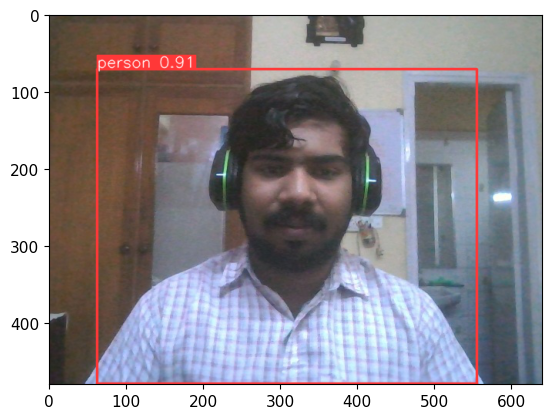

In [77]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [85]:
import os

data_path = r"C:\Users\Acer pc\Downloads\Drowsiness Detection"  # Path to the dataset directory
train_path = os.path.join(data_path, "train")  # Path to the training images directory
val_path = os.path.join(data_path, "val")  # Path to the validation images directory
yaml_path = "path/to/dataset.yaml"  # Path to the dataset YAML file
weights_path = r"C:\Users\Acer pc\Downloads\yolov5s.pt"  # Path to the pre-trained weights file (e.g., yolov5s.pt)
output_path = r"C:\Users\Acer pc\Downloads"  # Path to save the trained model

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        print("Captured image:", imgname)
        
        # Move the captured image to the corresponding directory
        if label == "drowsy":
            os.rename(imgname, os.path.join(train_path, os.path.basename(imgname)))
        elif label == "awake":
            os.rename(imgname, os.path.join(val_path, os.path.basename(imgname)))

# Train the model
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 50 --data "{yaml_path}" --weights "{weights_path}" --project "{output_path}"
